In [1]:
#Import Libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the data
leads_df = pd.read_csv('Leads.csv',encoding="utf-8")

In [3]:
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
#Replacing the space in column names by '_' and converting to lower case
leads_df.columns = leads_df.columns.str.lower().str.strip().str.replace(' ','_')

In [5]:
leads_df.head()

,prospect_id,lead_number,lead_origin,lead_source,do_not_email,do_not_call,converted,totalvisits,total_time_spent_on_website,page_views_per_visit,...,get_updates_on_dm_content,lead_profile,city,asymmetrique_activity_index,asymmetrique_profile_index,asymmetrique_activity_score,asymmetrique_profile_score,i_agree_to_pay_the_amount_through_cheque,a_free_copy_of_mastering_the_interview,last_notable_activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
leads_df.describe()

,lead_number,converted,totalvisits,total_time_spent_on_website,page_views_per_visit,asymmetrique_activity_score,asymmetrique_profile_score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
#Checking for duplicate values
sum(leads_df.duplicated())

0

In [8]:
#Checking for percentage of leads converted and not converted
#wherein 1 means it was converted and 0 means it wasn’t converted
round(leads_df.converted.value_counts()/len(leads_df.index),4)*100

0    61.46
1    38.54
Name: converted, dtype: float64

In [9]:
#Function to check null values
def null_summary(data):
    df = pd.DataFrame([data.isnull().sum(),
              round(100*(data.isnull().sum()/len(data.index)), 2)]
            ).T.rename(columns={0:'null_count',1:'null_percentage'}).\
sort_values(by='null_percentage',ascending=False)
    return df

In [10]:
null_summary(leads_df)

,null_count,null_percentage
lead_quality,4767.0,51.59
asymmetrique_activity_index,4218.0,45.65
asymmetrique_profile_score,4218.0,45.65
asymmetrique_activity_score,4218.0,45.65
asymmetrique_profile_index,4218.0,45.65
tags,3353.0,36.29
lead_profile,2709.0,29.32
what_matters_most_to_you_in_choosing_a_course,2709.0,29.32
what_is_your_current_occupation,2690.0,29.11
country,2461.0,26.63


In [11]:
#Dropping the variables with missing values more than 30%.
#Creating a list of dropped columns
dropped_columns=list(null_summary(leads_df).loc[null_summary(leads_df)['null_percentage'] > 30 , :].index)
dropped_columns

['lead_quality',
 'asymmetrique_activity_index',
 'asymmetrique_profile_score',
 'asymmetrique_activity_score',
 'asymmetrique_profile_index',
 'tags']

In [12]:
#Dropping the Prospect_ID and Lead_Number as these are unique id's assign to customers
dropped_columns.extend(['prospect_id','lead_number'])

In [13]:
#Checking the variables to be dropped
dropped_columns

['lead_quality',
 'asymmetrique_activity_index',
 'asymmetrique_profile_score',
 'asymmetrique_activity_score',
 'asymmetrique_profile_index',
 'tags',
 'prospect_id',
 'lead_number']

In [14]:
leads_df.drop(columns=dropped_columns,inplace=True)

In [15]:
leads_df.shape

(9240, 29)

In [16]:
leads_df.head()

,lead_origin,lead_source,do_not_email,do_not_call,converted,totalvisits,total_time_spent_on_website,page_views_per_visit,last_activity,country,...,digital_advertisement,through_recommendations,receive_more_updates_about_our_courses,update_me_on_supply_chain_content,get_updates_on_dm_content,lead_profile,city,i_agree_to_pay_the_amount_through_cheque,a_free_copy_of_mastering_the_interview,last_notable_activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,No,No,No,No,Select,Select,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,No,No,No,No,Select,Select,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,No,No,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,No,No,No,No,Select,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,No,No,No,No,Select,Mumbai,No,No,Modified


In [17]:
#As per the data 'select' which means the customer had not selected this option while filling the form is as good as NaN.
#We treat the select value rather than dropping them as we might lose important data.
leads_df.lead_profile.replace(np.nan,"Select",inplace=True)
leads_df.specialization.replace(np.nan,"Select",inplace=True)
leads_df.city.replace(np.nan,"Select",inplace=True)

In [18]:
#Differentiating the numerical and categorical variables
numerical_vars = list(leads_df.select_dtypes(include=[np.number]).columns)
categorical_vars = list(leads_df.select_dtypes(exclude=[np.number]).columns)

In [19]:
#Converting the values of categorical variables to lower case
leads_df = leads_df.applymap (lambda x: x.lower() if  type(x) == str else x)

In [20]:
null_summary(leads_df)

,null_count,null_percentage
what_matters_most_to_you_in_choosing_a_course,2709.0,29.32
what_is_your_current_occupation,2690.0,29.11
country,2461.0,26.63
how_did_you_hear_about_x_education,2207.0,23.89
totalvisits,137.0,1.48
page_views_per_visit,137.0,1.48
last_activity,103.0,1.11
lead_source,36.0,0.39
receive_more_updates_about_our_courses,0.0,0.00
update_me_on_supply_chain_content,0.0,0.00


# Missing Value Treatment

#### what_matters_most_to_you_in_choosing_a_course    29.32%
#### what_is_your_current_occupation		                          29.11%
#### country	                                                                           26.63%
#### totalvisits                                                                           01.48%
#### page_views_per_visit	                                                    01.48%
#### last_activity	                                                                     01.11%
#### lead_source                                                                       00.39%

In [21]:
#Createing the function to count of values as per category in column
def column_category_counts(data):
    return pd.DataFrame(data.value_counts(dropna=False))

In [22]:
#Creating function to replace missing values in a column
def missing_value_treatment(data,x,by):
    if x == 'null':
        data.fillna(by,inplace=True)
    else:
        data.replace(x,by,inplace=True)

In [23]:
#Checking for values of what_matters_most_to_you_in_choosing_a_course
column_category_counts(leads_df.what_matters_most_to_you_in_choosing_a_course)

,what_matters_most_to_you_in_choosing_a_course
better career prospects,6528
NaN,2709
flexibility & convenience,2
other,1


In [24]:
#Replacing missing values (NaN) and flexibility & convenience with others
missing_value_treatment(data=leads_df.what_matters_most_to_you_in_choosing_a_course,x='null',by='other')
missing_value_treatment(data=leads_df.what_matters_most_to_you_in_choosing_a_course,x='flexibility & convenience',by='other')
column_category_counts(leads_df.what_matters_most_to_you_in_choosing_a_course)

,what_matters_most_to_you_in_choosing_a_course
better career prospects,6528
other,2712


In [25]:
#Checking for values of what_is_your_current_occupation 
column_category_counts(leads_df.what_is_your_current_occupation)

,what_is_your_current_occupation
unemployed,5600
NaN,2690
working professional,706
student,210
other,16
housewife,10
businessman,8


In [26]:
#Replacing missing values (NaN),housewife and businessman with others
missing_value_treatment(data=leads_df.what_is_your_current_occupation,x='null',by='other')
missing_value_treatment(data=leads_df.what_is_your_current_occupation,x='housewife',by='other')
missing_value_treatment(data=leads_df.what_is_your_current_occupation,x='businessman',by='other')
column_category_counts(leads_df.what_is_your_current_occupation)

,what_is_your_current_occupation
unemployed,5600
other,2724
working professional,706
student,210


In [27]:
#Checking for values of country
column_category_counts(leads_df.country)

,country
india,6492
NaN,2461
united states,69
united arab emirates,53
singapore,24
saudi arabia,21
united kingdom,15
australia,13
qatar,10
bahrain,7


In [28]:
#Combining countries with less than 10 records to others
for z,c in dict(leads_df.country.value_counts()).items():
    if c < 10:
        leads_df.country.replace(z,'other',inplace=True)
column_category_counts(leads_df.country)

,country
india,6492
NaN,2461
other,82
united states,69
united arab emirates,53
singapore,24
saudi arabia,21
united kingdom,15
australia,13
qatar,10


In [29]:
#Replacing missing values with unknown
missing_value_treatment(data=leads_df.country,x='null',by='unknown')
column_category_counts(leads_df.country)

,country
india,6492
unknown,2461
other,82
united states,69
united arab emirates,53
singapore,24
saudi arabia,21
united kingdom,15
australia,13
qatar,10


In [30]:
#Checking for values of totalvisits
column_category_counts(leads_df.totalvisits)

,totalvisits
0.0,2189
2.0,1680
3.0,1306
4.0,1120
5.0,783
6.0,466
1.0,395
7.0,309
8.0,224
9.0,164


In [31]:
#checking for summary of totalvisits
leads_df.totalvisits.describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: totalvisits, dtype: float64

In [32]:
#Checking for median of totalvisits
leads_df.totalvisits.median()

3.0

In [33]:
#Replace missing values by the median
leads_df.totalvisits.fillna(leads_df.totalvisits.median(),inplace=True)
column_category_counts(leads_df.totalvisits)

,totalvisits
0.0,2189
2.0,1680
3.0,1443
4.0,1120
5.0,783
6.0,466
1.0,395
7.0,309
8.0,224
9.0,164


In [34]:
#Checking for values of page_views_per_visit
column_category_counts(leads_df.page_views_per_visit)

,page_views_per_visit
0.00,2189
2.00,1795
3.00,1196
4.00,896
1.00,651
5.00,517
1.50,306
6.00,244
2.50,241
NaN,137


In [35]:
#checking for summary of page_views_per_visit
leads_df.page_views_per_visit.describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: page_views_per_visit, dtype: float64

In [36]:
#Checking for median of page_views_per_visit
leads_df.page_views_per_visit.median()

2.0

In [37]:
#Replace missing values by the median
leads_df.page_views_per_visit.fillna(leads_df.page_views_per_visit.median(),inplace=True)
column_category_counts(leads_df.page_views_per_visit)

,page_views_per_visit
0.00,2189
2.00,1932
3.00,1196
4.00,896
1.00,651
5.00,517
1.50,306
6.00,244
2.50,241
7.00,133


In [38]:
#Checking for values of last_activity
column_category_counts(leads_df.last_activity)

,last_activity
email opened,3437
sms sent,2745
olark chat conversation,973
page visited on website,640
converted to lead,428
email bounced,326
email link clicked,267
form submitted on website,116
NaN,103
unreachable,93


In [39]:
#Checking for missing values, last_notable_activity and converted users
leads_df[leads_df.last_activity.isna()][['last_activity','last_notable_activity','converted']]

,last_activity,last_notable_activity,converted
77,NaN,modified,1
79,NaN,modified,1
81,NaN,modified,1
88,NaN,modified,1
120,NaN,modified,1
133,NaN,modified,1
134,NaN,modified,1
177,NaN,modified,1
179,NaN,modified,1
180,NaN,modified,1


In [40]:
#checking for values of last_notable_activity
leads_df.last_notable_activity.value_counts(dropna=False)

modified                        3407
email opened                    2827
sms sent                        2172
page visited on website          318
olark chat conversation          183
email link clicked               173
email bounced                     60
unsubscribed                      47
unreachable                       32
had a phone conversation          14
email marked spam                  2
email received                     1
resubscribed to emails             1
view in browser link clicked       1
approached upfront                 1
form submitted on website          1
Name: last_notable_activity, dtype: int64

In [41]:
set(leads_df.last_activity) - set(leads_df.last_notable_activity)

{'converted to lead', nan, 'visited booth in tradeshow'}

In [42]:
set(leads_df.last_notable_activity) - set(leads_df.last_activity)

{'modified'}

In [43]:
#Checking for correlation of last_activity and last_notable_activity
leads_df[['last_activity','last_notable_activity']].apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

,last_activity,last_notable_activity
last_activity,1.000000,0.737304
last_notable_activity,0.737304,1.000000


In [44]:
#There is high correlation between last_activity and last_notable_activity we can drop one of them
#Dropping last_activity
leads_df.drop(columns=['last_activity'],inplace=True)
dropped_columns.append('last_activity')

In [45]:
#Combining categories with less than 10 records to other
# last_notable_activity
for z,a in dict(leads_df.last_notable_activity.value_counts()).items():
    if a < 10:
        leads_df.last_notable_activity.replace(z,'other',inplace=True)

column_category_counts(leads_df.last_notable_activity)

,last_notable_activity
modified,3407
email opened,2827
sms sent,2172
page visited on website,318
olark chat conversation,183
email link clicked,173
email bounced,60
unsubscribed,47
unreachable,32
had a phone conversation,14


In [46]:
column_category_counts(leads_df.lead_source)

,lead_source
google,2873
direct traffic,2543
olark chat,1755
organic search,1154
reference,534
welingak website,142
referral sites,125
facebook,55
NaN,36
bing,6


In [47]:
#Replacing missing values to unknow
missing_value_treatment(leads_df.lead_source,x='null',by='unknown')

#Combining categories with less than 10 records to other
for z,a in dict(leads_df.lead_source.value_counts()).items():
    if a < 10:
        leads_df.lead_source.replace(z,'other',inplace=True)

column_category_counts(leads_df.lead_source)

,lead_source
google,2873
direct traffic,2543
olark chat,1755
organic search,1154
reference,534
welingak website,142
referral sites,125
facebook,55
unknown,36
other,23


In [48]:
#Checking for missing values percentage
null_summary(leads_df)

,null_count,null_percentage
how_did_you_hear_about_x_education,2207.0,23.89
lead_origin,0.0,0.00
newspaper_article,0.0,0.00
a_free_copy_of_mastering_the_interview,0.0,0.00
i_agree_to_pay_the_amount_through_cheque,0.0,0.00
city,0.0,0.00
lead_profile,0.0,0.00
get_updates_on_dm_content,0.0,0.00
update_me_on_supply_chain_content,0.0,0.00
receive_more_updates_about_our_courses,0.0,0.00


### Categorical Data Cleaning

In [49]:
# categorical variables
categorical_vars = list(leads_df.select_dtypes(exclude=[np.number]).columns)
categorical_vars

['lead_origin',
 'lead_source',
 'do_not_email',
 'do_not_call',
 'country',
 'specialization',
 'how_did_you_hear_about_x_education',
 'what_is_your_current_occupation',
 'what_matters_most_to_you_in_choosing_a_course',
 'search',
 'magazine',
 'newspaper_article',
 'x_education_forums',
 'newspaper',
 'digital_advertisement',
 'through_recommendations',
 'receive_more_updates_about_our_courses',
 'update_me_on_supply_chain_content',
 'get_updates_on_dm_content',
 'lead_profile',
 'city',
 'i_agree_to_pay_the_amount_through_cheque',
 'a_free_copy_of_mastering_the_interview',
 'last_notable_activity']

In [50]:
#checking for multiple categories in columns

for column in categorical_vars:
    if leads_df[column].nunique() == 1:
        print("Column {} has only 1 category.\n".format(column))
        leads_df.drop([column],axis=1,inplace=True)
        dropped_columns.append(column)

Column magazine has only 1 category.

Column receive_more_updates_about_our_courses has only 1 category.

Column update_me_on_supply_chain_content has only 1 category.

Column get_updates_on_dm_content has only 1 category.

Column i_agree_to_pay_the_amount_through_cheque has only 1 category.



In [51]:
categorical_vars = list(leads_df.select_dtypes(exclude=[np.number]).columns)
categorical_vars

['lead_origin',
 'lead_source',
 'do_not_email',
 'do_not_call',
 'country',
 'specialization',
 'how_did_you_hear_about_x_education',
 'what_is_your_current_occupation',
 'what_matters_most_to_you_in_choosing_a_course',
 'search',
 'newspaper_article',
 'x_education_forums',
 'newspaper',
 'digital_advertisement',
 'through_recommendations',
 'lead_profile',
 'city',
 'a_free_copy_of_mastering_the_interview',
 'last_notable_activity']

In [52]:
#Checking for count of categories as per columns

for column in categorical_vars:
    print("Column Name: ",column)
    display(column_category_counts(leads_df[column]).T)
    print(63*"==")

Column Name:  lead_origin


,landing page submission,api,lead add form,lead import,quick add form
lead_origin,4886,3580,718,55,1


Column Name:  lead_source


,google,direct traffic,olark chat,organic search,reference,welingak website,referral sites,facebook,unknown,other
lead_source,2873,2543,1755,1154,534,142,125,55,36,23


Column Name:  do_not_email


,no,yes
do_not_email,8506,734


Column Name:  do_not_call


,no,yes
do_not_call,9238,2


Column Name:  country


,india,unknown,other,united states,united arab emirates,singapore,saudi arabia,united kingdom,australia,qatar
country,6492,2461,82,69,53,24,21,15,13,10


Column Name:  specialization


,select,finance management,human resource management,marketing management,operations management,business administration,it projects management,supply chain management,"banking, investment and insurance",travel and tourism,media and advertising,international business,healthcare management,hospitality management,e-commerce,retail management,rural and agribusiness,e-business,services excellence
specialization,3380,976,848,838,503,403,366,349,338,203,203,178,159,114,112,100,73,57,40


Column Name:  how_did_you_hear_about_x_education


,select,nan,online search,word of mouth,student of someschool,other,multiple sources,advertisements,social media,email,sms
how_did_you_hear_about_x_education,5043,2207,808,348,310,186,152,70,67,26,23


Column Name:  what_is_your_current_occupation


,unemployed,other,working professional,student
what_is_your_current_occupation,5600,2724,706,210


Column Name:  what_matters_most_to_you_in_choosing_a_course


,better career prospects,other
what_matters_most_to_you_in_choosing_a_course,6528,2712


Column Name:  search


,no,yes
search,9226,14


Column Name:  newspaper_article


,no,yes
newspaper_article,9238,2


Column Name:  x_education_forums


,no,yes
x_education_forums,9239,1


Column Name:  newspaper


,no,yes
newspaper,9239,1


Column Name:  digital_advertisement


,no,yes
digital_advertisement,9236,4


Column Name:  through_recommendations


,no,yes
through_recommendations,9233,7


Column Name:  lead_profile


,select,potential lead,other leads,student of someschool,lateral student,dual specialization student
lead_profile,6855,1613,487,241,24,20


Column Name:  city


,select,mumbai,thane & outskirts,other cities,other cities of maharashtra,other metro cities,tier ii cities
city,3669,3222,752,686,457,380,74


Column Name:  a_free_copy_of_mastering_the_interview


,no,yes
a_free_copy_of_mastering_the_interview,6352,2888


Column Name:  last_notable_activity


,modified,email opened,sms sent,page visited on website,olark chat conversation,email link clicked,email bounced,unsubscribed,unreachable,had a phone conversation,other
last_notable_activity,3407,2827,2172,318,183,173,60,47,32,14,7


# Column variance
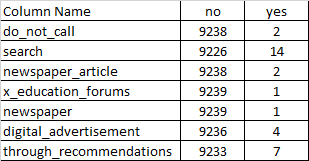

In [53]:
# Drop the columns with very low variance in the categories
for column in ['do_not_call',
            'search',
            'newspaper_article',
            'x_education_forums',
            'newspaper',
            'digital_advertisement',
            'through_recommendations']:
    leads_df.drop([column],axis=1,inplace=True)
    dropped_columns.append(column)

In [54]:
# Rename 'quick add form' to 'lead add form'
leads_df.lead_origin.replace('quick add form','lead add form',inplace=True)

In [55]:
print(leads_df.columns)
print(leads_df.shape)

Index(['lead_origin', 'lead_source', 'do_not_email', 'converted',
       'totalvisits', 'total_time_spent_on_website', 'page_views_per_visit',
       'country', 'specialization', 'how_did_you_hear_about_x_education',
       'what_is_your_current_occupation',
       'what_matters_most_to_you_in_choosing_a_course', 'lead_profile', 'city',
       'a_free_copy_of_mastering_the_interview', 'last_notable_activity'],
      dtype='object')
(9240, 16)


In [56]:
# Rename columns
leads_df.columns = ['lead_origin',
                    'lead_source', 
                    'do_not_email', 
                    'converted', 
                    'totalvisits', 
                    'total_time_spent_on_website', 
                    'page_views_per_visit', 
                    'country', 
                    'specialization',
                    'hear_about_x_education',
                    'current_occupation', 
                    'course_choose_criteria',
                    'lead_profile',
                    'city',
                    'free_copy_of_book', 
                    'last_notable_activity']

In [57]:
# Recreateing categorical variables
categorical_vars = list(leads_df.select_dtypes(exclude=[np.number]).columns)
categorical_vars

['lead_origin',
 'lead_source',
 'do_not_email',
 'country',
 'specialization',
 'hear_about_x_education',
 'current_occupation',
 'course_choose_criteria',
 'lead_profile',
 'city',
 'free_copy_of_book',
 'last_notable_activity']

In [58]:
#Checking for count of categories as per columns
for column in categorical_vars:
    print("Column Name : ",column)
    display(column_category_counts(leads_df[column]).T)
    print(63*"==")

Column Name :  lead_origin


,landing page submission,api,lead add form,lead import
lead_origin,4886,3580,719,55


Column Name :  lead_source


,google,direct traffic,olark chat,organic search,reference,welingak website,referral sites,facebook,unknown,other
lead_source,2873,2543,1755,1154,534,142,125,55,36,23


Column Name :  do_not_email


,no,yes
do_not_email,8506,734


Column Name :  country


,india,unknown,other,united states,united arab emirates,singapore,saudi arabia,united kingdom,australia,qatar
country,6492,2461,82,69,53,24,21,15,13,10


Column Name :  specialization


,select,finance management,human resource management,marketing management,operations management,business administration,it projects management,supply chain management,"banking, investment and insurance",travel and tourism,media and advertising,international business,healthcare management,hospitality management,e-commerce,retail management,rural and agribusiness,e-business,services excellence
specialization,3380,976,848,838,503,403,366,349,338,203,203,178,159,114,112,100,73,57,40


Column Name :  hear_about_x_education


,select,nan,online search,word of mouth,student of someschool,other,multiple sources,advertisements,social media,email,sms
hear_about_x_education,5043,2207,808,348,310,186,152,70,67,26,23


Column Name :  current_occupation


,unemployed,other,working professional,student
current_occupation,5600,2724,706,210


Column Name :  course_choose_criteria


,better career prospects,other
course_choose_criteria,6528,2712


Column Name :  lead_profile


,select,potential lead,other leads,student of someschool,lateral student,dual specialization student
lead_profile,6855,1613,487,241,24,20


Column Name :  city


,select,mumbai,thane & outskirts,other cities,other cities of maharashtra,other metro cities,tier ii cities
city,3669,3222,752,686,457,380,74


Column Name :  free_copy_of_book


,no,yes
free_copy_of_book,6352,2888


Column Name :  last_notable_activity


,modified,email opened,sms sent,page visited on website,olark chat conversation,email link clicked,email bounced,unsubscribed,unreachable,had a phone conversation,other
last_notable_activity,3407,2827,2172,318,183,173,60,47,32,14,7


# Outlier Treatment

In [59]:
#Checking for percentiles
leads_df[numerical_vars].describe(percentiles=[0.25,0.75,0.9,0.95,0.975])

,converted,totalvisits,total_time_spent_on_website,page_views_per_visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.438636,487.698268,2.357440
std,0.486714,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
90%,1.000000,7.000000,1380.000000,5.000000
95%,1.000000,10.000000,1562.000000,6.000000
97.5%,1.000000,12.000000,1692.050000,7.000000


<Figure size 1080x720 with 0 Axes>

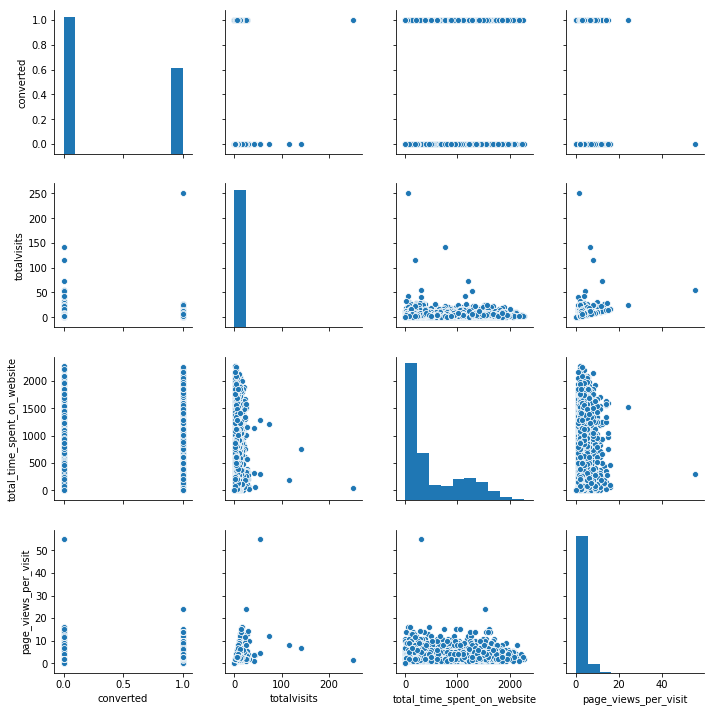

In [60]:
#Checking for the spread of data
plt.figure(figsize=(15, 10))

sns.pairplot(leads_df)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


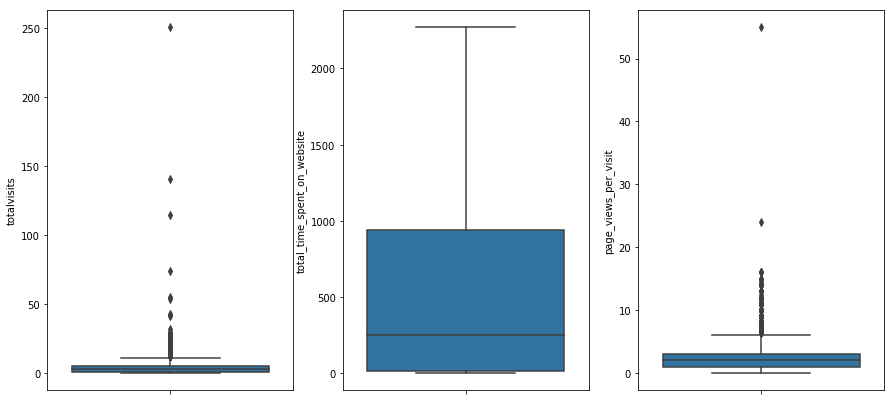

In [61]:
#Checking for Boxplot
plt.figure(figsize=(15, 7))

count = 1
for var in numerical_vars:
    plt.subplot(1, 3, count)
    if var != 'converted':
        sns.boxplot(y=leads_df[var])
        count=count+1
    
plt.show()

In [62]:
#Checking for totalvists
leads_df.totalvisits.sort_values(ascending=False).head(15)

6102    251.0
2322    141.0
5608    115.0
5283     74.0
2190     55.0
5538     54.0
1160     43.0
8230     42.0
5530     41.0
6580     32.0
1824     30.0
8001     29.0
2861     29.0
4471     28.0
7153     28.0
Name: totalvisits, dtype: float64

In [63]:
#Sorting the values of totalvisits
leads_df[leads_df.totalvisits > 30]['totalvisits'].sort_values()

6580     32.0
5530     41.0
8230     42.0
1160     43.0
5538     54.0
2190     55.0
5283     74.0
5608    115.0
2322    141.0
6102    251.0
Name: totalvisits, dtype: float64

In [64]:
leads_df.page_views_per_visit.sort_values(ascending=False).head(15)

2190    55.0
6805    24.0
5495    16.0
5164    16.0
125     16.0
387     15.0
5915    15.0
8640    15.0
4518    15.0
8001    14.5
6300    14.0
1697    14.0
5531    14.0
246     14.0
7685    14.0
Name: page_views_per_visit, dtype: float64

In [65]:
#As it can be seen that to treat outlier we need to set the limit
#We consider 30 as limit for totalvisits and consider visits as 30 and above.
#Same is the case with page_views_per_visit we set it as 16 so we consider page_views_per_visit as 16 and above

pageview = np.array(leads_df['page_views_per_visit'].values.tolist())
leads_df['page_views_per_visit'] = np.where(pageview > 16, 16, pageview).tolist()

In [66]:
visits = np.array(leads_df['totalvisits'].values.tolist())
leads_df['totalvisits'] = np.where(visits > 30, 30, visits).tolist()

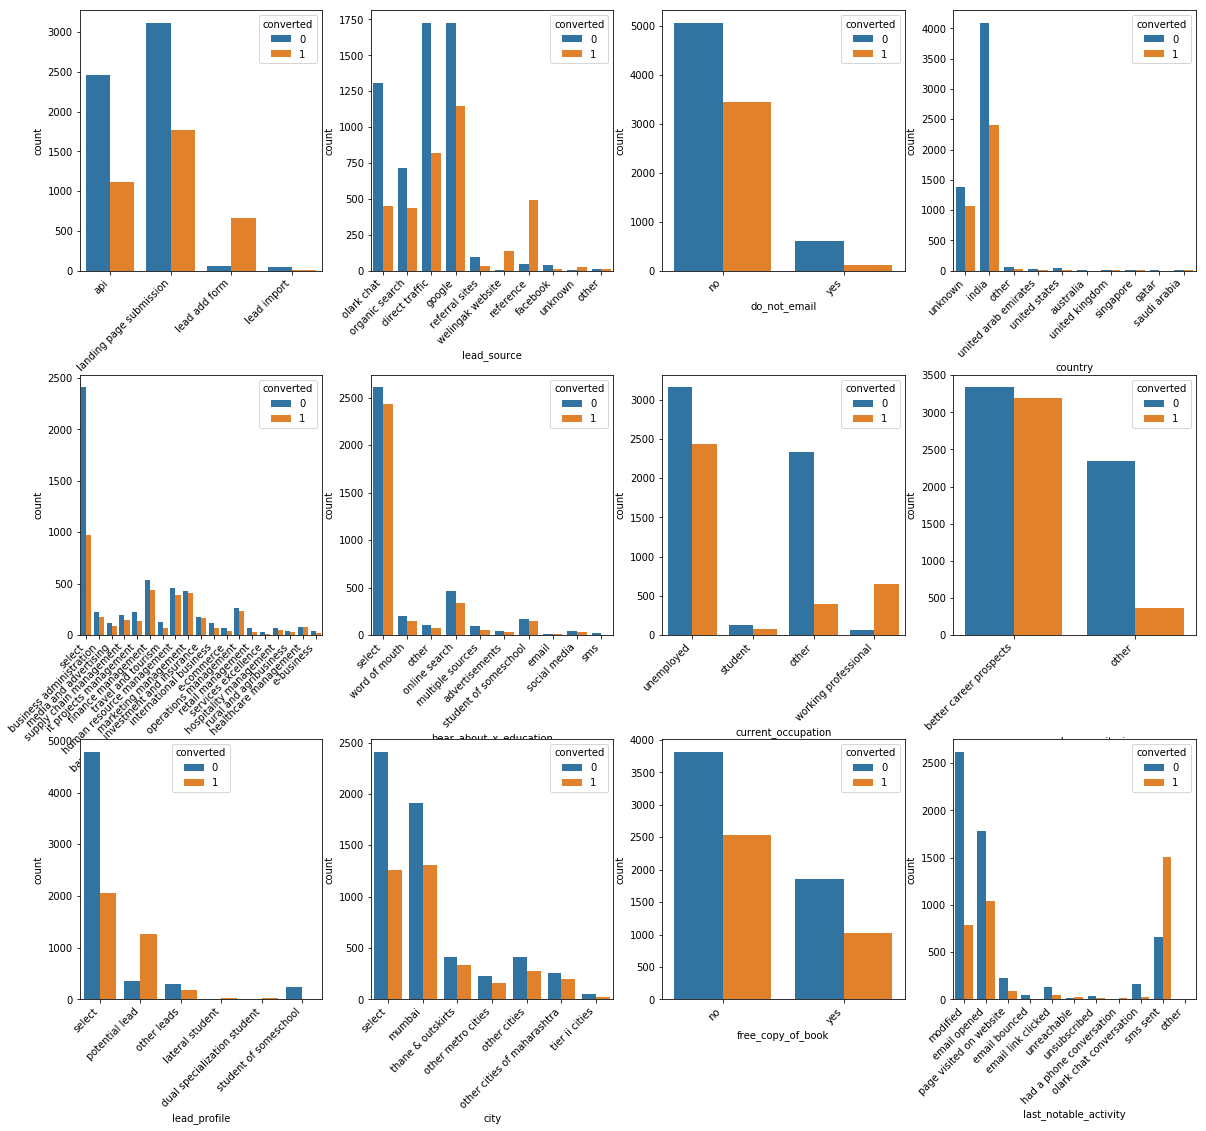

In [67]:
#Checking for converted and non converted leads for categorical variables
fig = plt.figure(figsize=(20, 45), )

count = 1
for var in categorical_vars:
    plt.subplot(7, 4, count)
    ax=sns.countplot(x=leads_df[var], hue=leads_df["converted"])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    count=count+1

plt.subplots_adjust(hspace = 0.4)
plt.show()

# Binary Encoding

In [68]:
# Binary encode yes as 1 and no as 0
leads_df['do_not_email'] = leads_df['do_not_email'].map({'yes': 1, 'no': 0})
leads_df['free_copy_of_book'] = leads_df['free_copy_of_book'].map({'yes': 1, 'no': 0})
leads_df['course_choose_criteria'] = leads_df['course_choose_criteria'].map({'better career prospects': 1, 'other': 0})

In [69]:
# Create a list of categorical variables with more than 2 categories for dummy variable creation
list_cat_var = []
for column in categorical_vars:
    _ = leads_df[column].nunique()
    if _ > 2:
        list_cat_var.append(column)
        print("{:<30} = {}".format(column,_))

lead_origin                    = 4
lead_source                    = 10
country                        = 10
specialization                 = 19
hear_about_x_education         = 10
current_occupation             = 4
lead_profile                   = 6
city                           = 7
last_notable_activity          = 11


In [70]:
#Checking for count of categories in categorical variable
for column in categorical_vars:
    print("Column Name : ",column)
    display(column_category_counts(leads_df[column]).T)

Column Name :  lead_origin


,landing page submission,api,lead add form,lead import
lead_origin,4886,3580,719,55


Column Name :  lead_source


,google,direct traffic,olark chat,organic search,reference,welingak website,referral sites,facebook,unknown,other
lead_source,2873,2543,1755,1154,534,142,125,55,36,23


Column Name :  do_not_email


,0,1
do_not_email,8506,734


Column Name :  country


,india,unknown,other,united states,united arab emirates,singapore,saudi arabia,united kingdom,australia,qatar
country,6492,2461,82,69,53,24,21,15,13,10


Column Name :  specialization


,select,finance management,human resource management,marketing management,operations management,business administration,it projects management,supply chain management,"banking, investment and insurance",travel and tourism,media and advertising,international business,healthcare management,hospitality management,e-commerce,retail management,rural and agribusiness,e-business,services excellence
specialization,3380,976,848,838,503,403,366,349,338,203,203,178,159,114,112,100,73,57,40


Column Name :  hear_about_x_education


,select,nan,online search,word of mouth,student of someschool,other,multiple sources,advertisements,social media,email,sms
hear_about_x_education,5043,2207,808,348,310,186,152,70,67,26,23


Column Name :  current_occupation


,unemployed,other,working professional,student
current_occupation,5600,2724,706,210


Column Name :  course_choose_criteria


,1,0
course_choose_criteria,6528,2712


Column Name :  lead_profile


,select,potential lead,other leads,student of someschool,lateral student,dual specialization student
lead_profile,6855,1613,487,241,24,20


Column Name :  city


,select,mumbai,thane & outskirts,other cities,other cities of maharashtra,other metro cities,tier ii cities
city,3669,3222,752,686,457,380,74


Column Name :  free_copy_of_book


,0,1
free_copy_of_book,6352,2888


Column Name :  last_notable_activity


,modified,email opened,sms sent,page visited on website,olark chat conversation,email link clicked,email bounced,unsubscribed,unreachable,had a phone conversation,other
last_notable_activity,3407,2827,2172,318,183,173,60,47,32,14,7


In [71]:
#Createing master dataframe with dummy variable
master_leads_df = pd.get_dummies(leads_df,columns=list_cat_var,drop_first=True)

In [72]:
master_leads_df.head()

,do_not_email,converted,totalvisits,total_time_spent_on_website,page_views_per_visit,course_choose_criteria,free_copy_of_book,lead_origin_landing page submission,lead_origin_lead add form,lead_origin_lead import,...,last_notable_activity_email link clicked,last_notable_activity_email opened,last_notable_activity_had a phone conversation,last_notable_activity_modified,last_notable_activity_olark chat conversation,last_notable_activity_other,last_notable_activity_page visited on website,last_notable_activity_sms sent,last_notable_activity_unreachable,last_notable_activity_unsubscribed
0,0,0,0.0,0,0.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,5.0,674,2.5,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


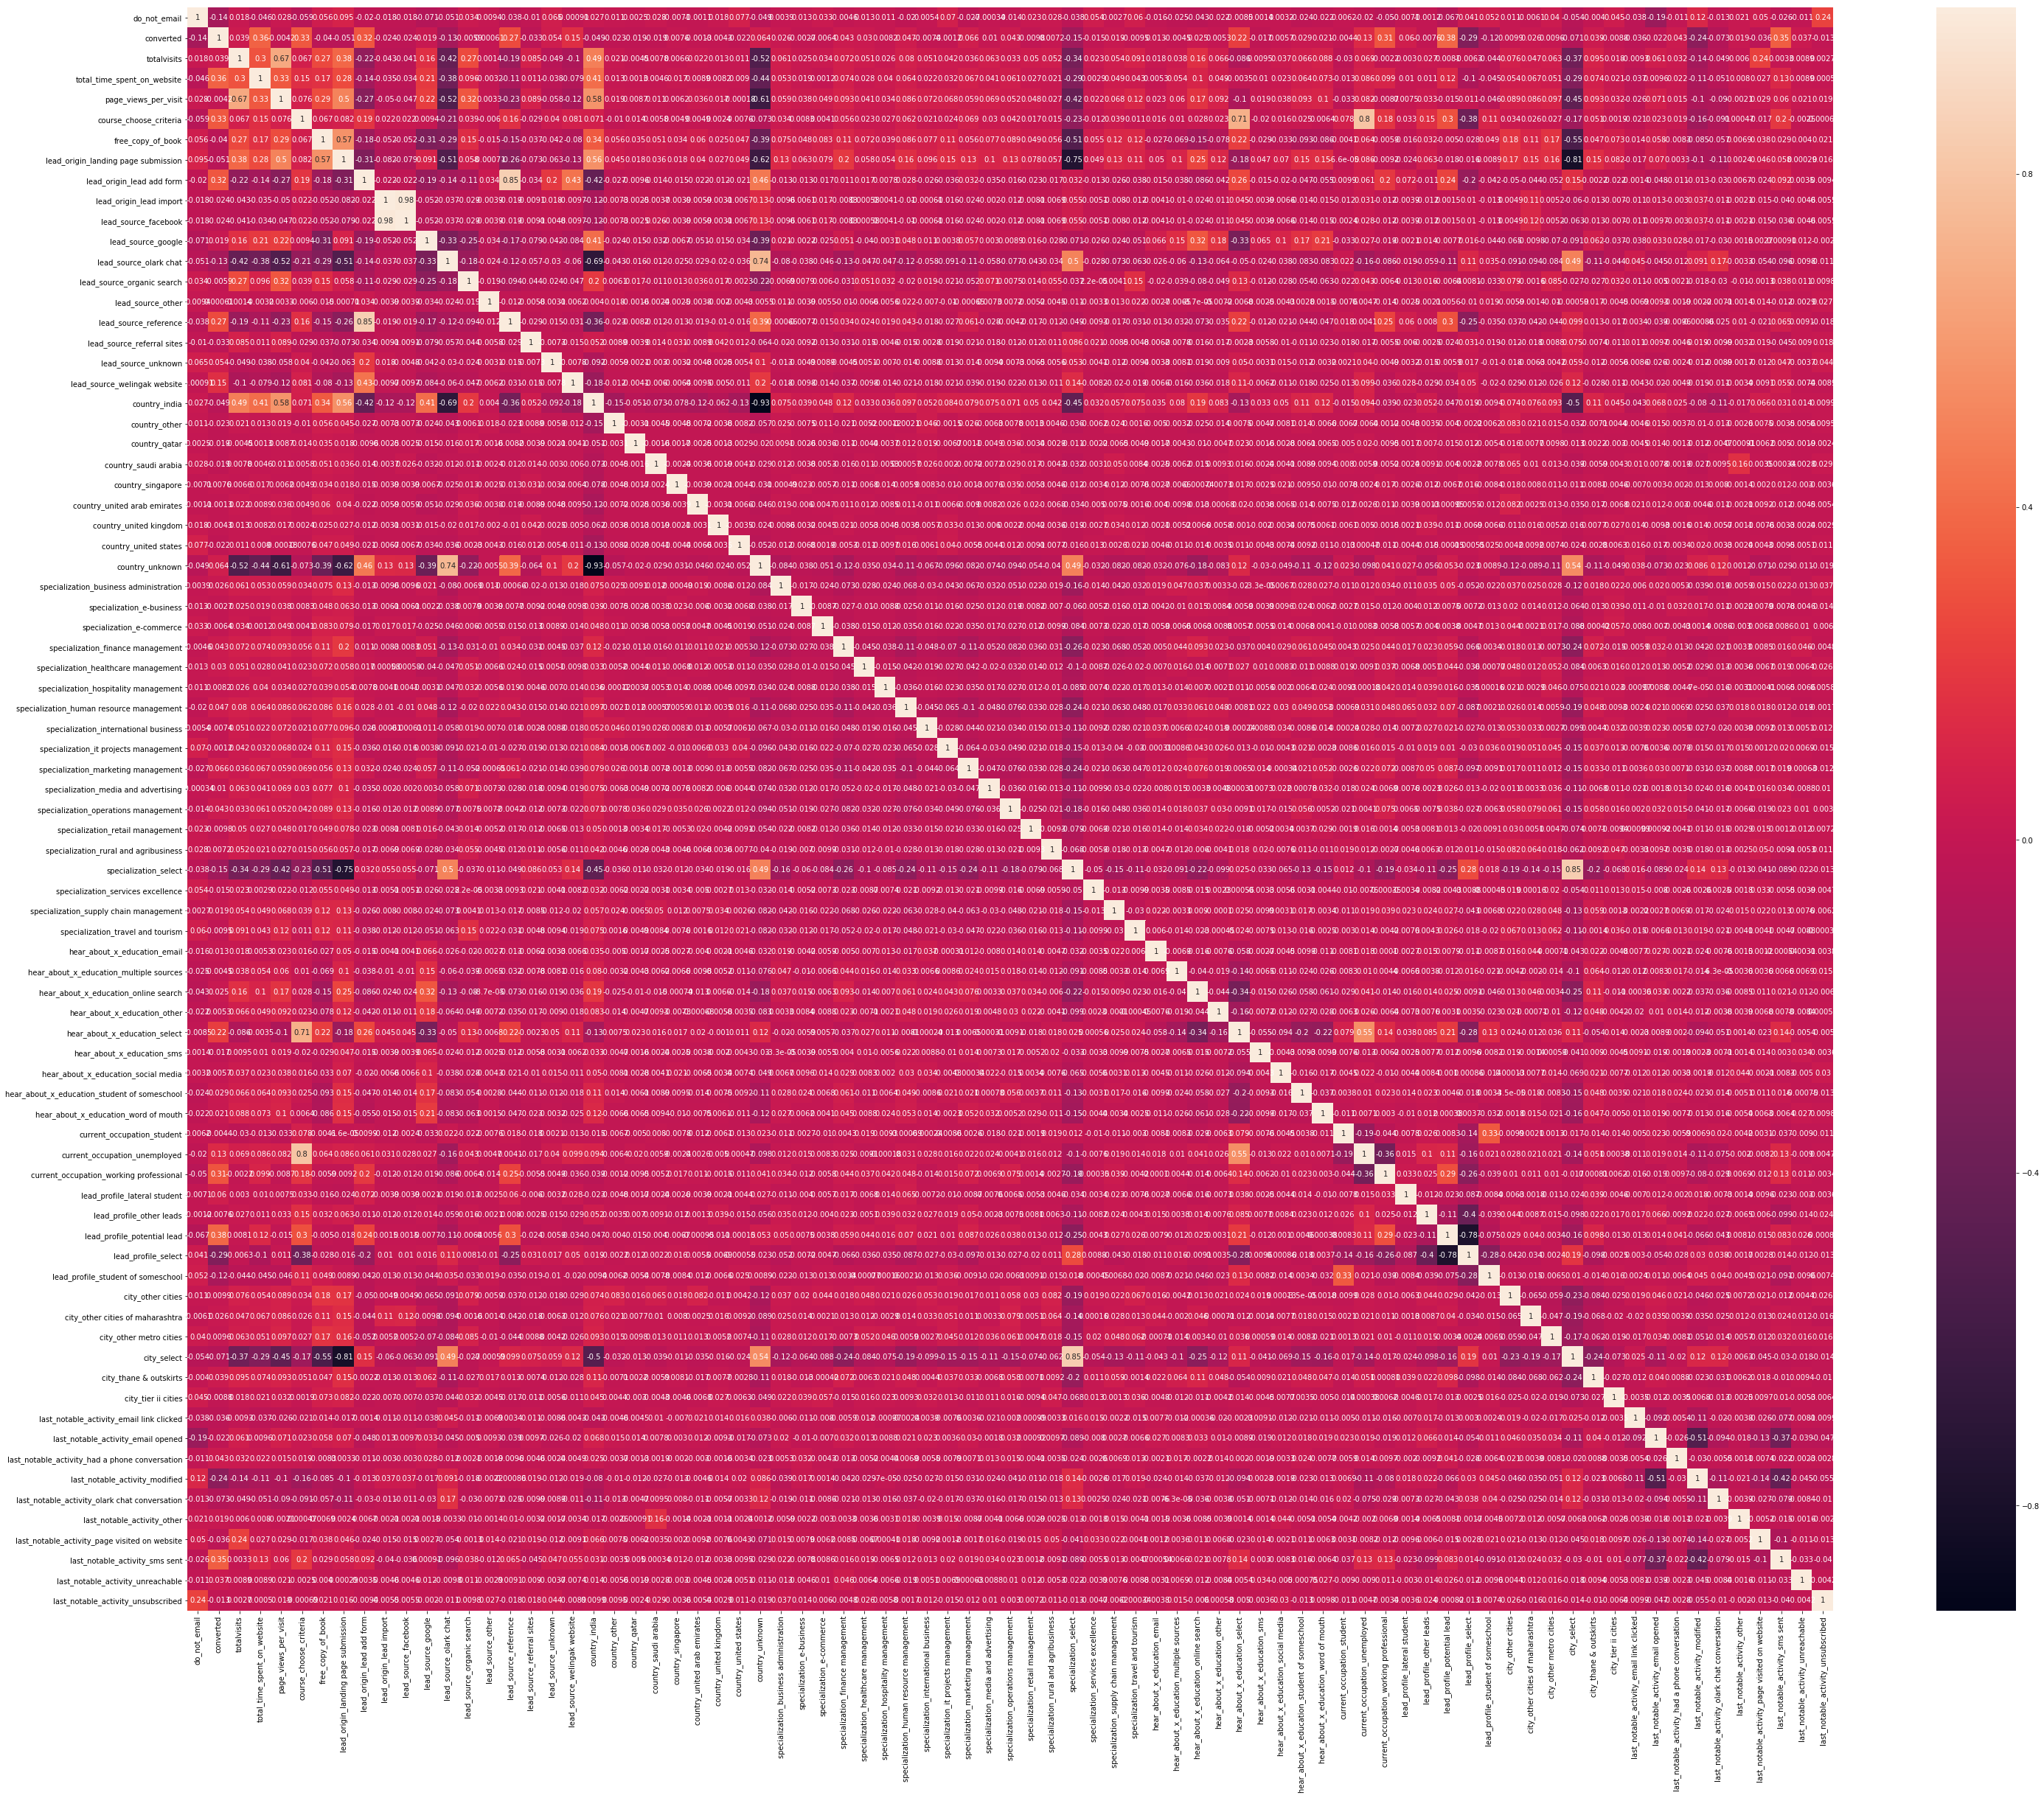

In [73]:
#correlation matrix 
plt.figure(figsize = (50,40))

sns.heatmap(master_leads_df.corr(),annot = True)
plt.show()

In [74]:
#To check for high correlation we find variables with correlation greater than 0.7
c_index = []
c_columns = []
c_value = []
for row in master_leads_df.columns:
    for column in master_leads_df.columns:
        if row != column:
            _ = master_leads_df[row].corr(master_leads_df[column])
            if _ > 0.7:
                
                if row < column:
                    c_index.append(row)
                    c_columns.append(column)
                    c_value.append(_)
                    
                else:
                    c_index.append(column)
                    c_columns.append(row)
                    c_value.append(_)
                    

In [75]:
correlation_mat = pd.DataFrame([c_index,c_columns,c_value]).T.rename(columns={0:'Variable 1',1:'Variable 2',2:'coefficient'})
correlation_mat = correlation_mat[correlation_mat.duplicated(subset=['Variable 1'])]
correlation_mat

,Variable 1,Variable 2,coefficient
1,course_choose_criteria,current_occupation_unemployed,0.798003
4,lead_origin_lead import,lead_source_facebook,0.981709
6,lead_origin_lead add form,lead_source_reference,0.852594
7,country_unknown,lead_source_olark chat,0.742487
9,course_choose_criteria,hear_about_x_education_select,0.705097
10,course_choose_criteria,current_occupation_unemployed,0.798003
11,city_select,specialization_select,0.845374


In [76]:
#Above df show the highly correlated variable and we can drop them
master_leads_df.drop(columns=correlation_mat['Variable 2'],inplace=True)

In [77]:
#Final clean dataframe
master_leads_df.head()

,do_not_email,converted,totalvisits,total_time_spent_on_website,page_views_per_visit,course_choose_criteria,free_copy_of_book,lead_origin_landing page submission,lead_origin_lead add form,lead_origin_lead import,...,last_notable_activity_email link clicked,last_notable_activity_email opened,last_notable_activity_had a phone conversation,last_notable_activity_modified,last_notable_activity_olark chat conversation,last_notable_activity_other,last_notable_activity_page visited on website,last_notable_activity_sms sent,last_notable_activity_unreachable,last_notable_activity_unsubscribed
0,0,0,0.0,0,0.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,5.0,674,2.5,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [78]:
from sklearn.model_selection import train_test_split

#Defining X
X = master_leads_df.drop(['converted'],axis=1)
X.head()

,do_not_email,totalvisits,total_time_spent_on_website,page_views_per_visit,course_choose_criteria,free_copy_of_book,lead_origin_landing page submission,lead_origin_lead add form,lead_origin_lead import,lead_source_google,...,last_notable_activity_email link clicked,last_notable_activity_email opened,last_notable_activity_had a phone conversation,last_notable_activity_modified,last_notable_activity_olark chat conversation,last_notable_activity_other,last_notable_activity_page visited on website,last_notable_activity_sms sent,last_notable_activity_unreachable,last_notable_activity_unsubscribed
0,0,0.0,0,0.0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2.0,1428,1.0,1,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [79]:
#Defining Y
Y = master_leads_df['converted']
Y.head()

0    0
1    0
2    1
3    0
4    1
Name: converted, dtype: int64

In [80]:
# Splitting the data into train & test in 70:30
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=100)

# Feature Scaling

In [81]:
#removing converted variable from numerical variable
numerical_vars.remove('converted')
numerical_vars

['totalvisits', 'total_time_spent_on_website', 'page_views_per_visit']

In [82]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train[numerical_vars] = scaler.fit_transform(X_train[numerical_vars])

X_train.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,do_not_email,totalvisits,total_time_spent_on_website,page_views_per_visit,course_choose_criteria,free_copy_of_book,lead_origin_landing page submission,lead_origin_lead add form,lead_origin_lead import,lead_source_google,...,last_notable_activity_email link clicked,last_notable_activity_email opened,last_notable_activity_had a phone conversation,last_notable_activity_modified,last_notable_activity_olark chat conversation,last_notable_activity_other,last_notable_activity_page visited on website,last_notable_activity_sms sent,last_notable_activity_unreachable,last_notable_activity_unsubscribed
1871,0,-0.951417,-0.885371,-1.137425,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6795,0,0.171687,0.005716,-0.491070,1,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3516,0,0.452463,-0.691418,0.077528,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8105,0,0.452463,1.365219,1.292480,1,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3934,0,-0.951417,-0.885371,-1.137425,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


# Model Building

## Logistic Regeression Model 1

In [83]:
import statsmodels.api as sm

Logit_m1 = sm.GLM(Y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
Result = Logit_m1.fit()
Result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6395
Model Family:                Binomial   Df Model:                           72
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2424.6
Date:                Sun, 09 Jun 2019   Deviance:                       4849.3
Time:                        15:00:05   Pearson chi2:                 7.17e+03
No. Iterations:                    22   Covariance Type:             nonrobust
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             21.6150   1.63e+04      0.001      0.999    -3.2e+04     3.2e+04
do_not_email                                      -1.2284      0.206     -5.966      0.000      -1.632      -0.825
totalvisits                                        0.2432      0.050      4.897      0.000       0.146       0.341
total_time_spent_on_website                        1.1112      0.043     25.958      0.000       1.027       1.195
page_views_per_visit                              -0.1746      0.056     -3.102      0.002      -0.285      -0.064
course_choose_criteria                             0.7017      0.094      7.470      0.000       0.518       0.886
free_copy_of_book                                 -0.0823      0.143     -0.576      0.565      -0.362       0.198
lead_origin_landing page submission               -0.8923      0.157     -5.682      0.000      -1.200      -0.584
lead_origin_lead add form                          1.8523      0.221      8.399      0.000       1.420       2.285
lead_origin_lead import                           -1.3787      0.577     -2.388      0.017      -2.510      -0.247
lead_source_google                                 0.1040      0.121      0.858      0.391      -0.133       0.341
lead_source_organic search                        -0.0218      0.136     -0.160      0.873      -0.289       0.246
lead_source_other                                  0.3644      0.766      0.476      0.634      -1.136       1.865
lead_source_referral sites                        -0.0719      0.330     -0.217      0.828      -0.720       0.576
lead_source_unknown                                0.1560      0.598      0.261      0.794      -1.016       1.328
lead_source_welingak website                       2.7856      0.754      3.694      0.000       1.308       4.264
country_india                                      0.8604      1.037      0.830      0.407      -1.172       2.893
country_other                                      0.4463      1.111      0.402      0.688      -1.732       2.624
country_qatar                                    -22.0955   2.37e+04     -0.001      0.999   -4.65e+04    4.65e+04
country_saudi arabia                              -0.3709      1.364     -0.272      0.786      -3.044       2.302
country_singapore                                  0.6526      1.268      0.515      0.607      -1.833       3.138
country_united arab emirates                       1.3512      1.130      1.196      0.232      -0.863       3.565
country_united kingdom                             0.7563      1.572      0.481      0.630      -2.325       3.838
country_united states                              1.1213      1.133      0.990      0.322      -1.099       3.341
country_unknown                                    1.9788

In [84]:
#Predicted values on the train set
Y_train_pred = Result.predict(sm.add_constant(X_train))
Y_train_pred[:10]

1871    0.293182
6795    0.156814
3516    0.306826
8105    0.855842
3934    0.137681
4844    0.997183
3297    0.152081
8071    0.992403
987     0.110457
7423    0.980423
dtype: float64

In [85]:
Y_train_pred = Y_train_pred.values.reshape(-1)
Y_train_pred[:10]

array([0.29318157, 0.15681355, 0.30682618, 0.85584239, 0.13768096,
       0.99718344, 0.15208112, 0.99240286, 0.11045691, 0.98042298])

In [86]:
#Checking for Actual and predicted values
Y_train_pred_final = pd.DataFrame({'Converted':Y_train.values, 
                                   'Conversion_Probability':Y_train_pred, 
                                   'Lead_Score': Y_train_pred*100})
Y_train_pred_final['Lead_ID'] = Y_train.index

#Creating a new column if Conversion_Probability > 0.5 assign 1 else 0
Y_train_pred_final['Predicted'] = Y_train_pred_final.Conversion_Probability.map(lambda x: 1 if x > 0.5 else 0)
Y_train_pred_final.head()

,Converted,Conversion_Probability,Lead_Score,Lead_ID,Predicted
0,0,0.293182,29.318157,1871,0
1,0,0.156814,15.681355,6795,0
2,0,0.306826,30.682618,3516,0
3,0,0.855842,85.584239,8105,1
4,0,0.137681,13.768096,3934,0


In [87]:
from sklearn import metrics

#Confusion matrix 
Confusion_Mat = metrics.confusion_matrix(Y_train_pred_final.Converted, Y_train_pred_final.Predicted )
print(Confusion_Mat)

[[3575  427]
 [ 635 1831]]


In [88]:
#Accuracy Score
print(metrics.accuracy_score(Y_train_pred_final.Converted, Y_train_pred_final.Predicted))

0.8358070500927643


In [89]:
# VIF (Variance Inflation Factor) 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,country_india,234.42
54,lead_profile_select,204.58
23,country_unknown,90.86
65,last_notable_activity_modified,56.91
53,lead_profile_potential lead,48.94
63,last_notable_activity_email opened,48.42
69,last_notable_activity_sms sent,37.67
52,lead_profile_other leads,14.83
6,lead_origin_landing page submission,10.42
59,city_select,9.68


In [90]:
#Feature Selection Using RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE

rfe = RFE(logreg, 12)
rfe = rfe.fit(X_train, Y_train)

In [91]:
rfe.support_

array([ True, False,  True, False, False, False, False,  True, False,
       False, False, False, False, False,  True, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
        True,  True, False, False, False, False, False, False, False,
       False,  True, False, False, False, False,  True,  True, False])

In [92]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('do_not_email', True, 1),
 ('totalvisits', False, 38),
 ('total_time_spent_on_website', True, 1),
 ('page_views_per_visit', False, 39),
 ('course_choose_criteria', False, 5),
 ('free_copy_of_book', False, 52),
 ('lead_origin_landing page submission', False, 13),
 ('lead_origin_lead add form', True, 1),
 ('lead_origin_lead import', False, 6),
 ('lead_source_google', False, 41),
 ('lead_source_organic search', False, 58),
 ('lead_source_other', False, 32),
 ('lead_source_referral sites', False, 56),
 ('lead_source_unknown', False, 55),
 ('lead_source_welingak website', True, 1),
 ('country_india', False, 30),
 ('country_other', False, 51),
 ('country_qatar', True, 1),
 ('country_saudi arabia', False, 7),
 ('country_singapore', False, 59),
 ('country_united arab emirates', False, 25),
 ('country_united kingdom', False, 60),
 ('country_united states', False, 29),
 ('country_unknown', False, 2),
 ('specialization_business administration', False, 50),
 ('specialization_e-business', False, 

In [93]:
col = X_train.columns[rfe.support_]

In [94]:
list(col)

['do_not_email',
 'total_time_spent_on_website',
 'lead_origin_lead add form',
 'lead_source_welingak website',
 'country_qatar',
 'current_occupation_working professional',
 'lead_profile_other leads',
 'lead_profile_select',
 'lead_profile_student of someschool',
 'last_notable_activity_had a phone conversation',
 'last_notable_activity_sms sent',
 'last_notable_activity_unreachable']

In [95]:
X_train.columns[~rfe.support_]

Index(['totalvisits', 'page_views_per_visit', 'course_choose_criteria',
       'free_copy_of_book', 'lead_origin_landing page submission',
       'lead_origin_lead import', 'lead_source_google',
       'lead_source_organic search', 'lead_source_other',
       'lead_source_referral sites', 'lead_source_unknown', 'country_india',
       'country_other', 'country_saudi arabia', 'country_singapore',
       'country_united arab emirates', 'country_united kingdom',
       'country_united states', 'country_unknown',
       'specialization_business administration', 'specialization_e-business',
       'specialization_e-commerce', 'specialization_finance management',
       'specialization_healthcare management',
       'specialization_hospitality management',
       'specialization_human resource management',
       'specialization_international business',
       'specialization_it projects management',
       'specialization_marketing management',
       'specialization_media and advertising',

## Logistic Regeression Model 2

In [96]:
X_train_sm = sm.add_constant(X_train[col])
Logit_m2 = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
Result = Logit_m2.fit()
Result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2609.7
Date:                Sun, 09 Jun 2019   Deviance:                       5219.3
Time:                        15:01:19   Pearson chi2:                 7.53e+03
No. Iterations:                    21   Covariance Type:             nonrobust
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              0.1566      0.088      1.773      0.076      -0.017       0.330
do_not_email                                      -1.3002      0.165     -7.874      0.000      -1.624      -0.977
total_time_spent_on_website                        0.9167      0.035     26.034      0.000       0.848       0.986
lead_origin_lead add form                          2.9218      0.190     15.389      0.000       2.550       3.294
lead_source_welingak website                       2.6757      0.747      3.581      0.000       1.211       4.140
country_qatar                                    -21.9262    1.5e+04     -0.001      0.999   -2.94e+04    2.93e+04
current_occupation_working professional            2.3930      0.192     12.442      0.000       2.016       2.770
lead_profile_other leads                          -1.3567      0.165     -8.202      0.000      -1.681      -1.032
lead_profile_select                               -1.7780      0.096    -18.600      0.000      -1.965      -1.591
lead_profile_student of someschool                -3.3218      0.428     -7.766      0.000      -4.160      -2.483
last_notable_activity_had a phone conversation     2.8395      1.152      2.465      0.014       0.581       5.098
last_notable_activity_sms sent                     1.6858      0.080     21.171      0.000       1.530       1.842
last_notable_activity_unreachable                  1.5232      0.546      2.788      0.005       0.452       2.594
==================================================================================================================
"""

In [97]:
#Predicted values on the train set
Y_train_pred = Result.predict(X_train_sm)
Y_train_pred[:10]

1871    0.080690
6795    0.165742
3516    0.094902
8105    0.788514
3934    0.080690
4844    0.997383
3297    0.091919
8071    0.994684
987     0.256180
7423    0.974730
dtype: float64

In [98]:
Y_train_pred = Y_train_pred.values.reshape(-1)
Y_train_pred[:10]

array([0.08069001, 0.16574208, 0.0949016 , 0.78851392, 0.08069001,
       0.99738323, 0.09191875, 0.99468423, 0.25617992, 0.97473001])

In [99]:
#Checking for Actual and predicted values
Y_train_pred_final = pd.DataFrame({'Converted':Y_train.values, 
                                   'Conversion_Probability':Y_train_pred, 
                                   'Lead_Score': Y_train_pred*100})
Y_train_pred_final['Lead_ID'] = Y_train.index

#Creating a new column if Conversion_Probability > 0.5 assign 1 else 0
Y_train_pred_final['Predicted'] = Y_train_pred_final.Conversion_Probability.map(lambda x: 1 if x > 0.5 else 0)
Y_train_pred_final.head()

,Converted,Conversion_Probability,Lead_Score,Lead_ID,Predicted
0,0,0.080690,8.069001,1871,0
1,0,0.165742,16.574208,6795,0
2,0,0.094902,9.490160,3516,0
3,0,0.788514,78.851392,8105,1
4,0,0.080690,8.069001,3934,0


In [100]:
#Confusion matrix 
Confusion_Mat = metrics.confusion_matrix(Y_train_pred_final.Converted, Y_train_pred_final.Predicted )
print(Confusion_Mat)

[[3630  372]
 [ 782 1684]]


In [101]:
#Accuracy Score
print(metrics.accuracy_score(Y_train_pred_final.Converted, Y_train_pred_final.Predicted))

0.8215831787260359


In [102]:
# VIF (Variance Inflation Factor) 
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,lead_origin_lead add form,1.38
10,last_notable_activity_sms sent,1.34
7,lead_profile_select,1.33
3,lead_source_welingak website,1.24
5,current_occupation_working professional,1.16
0,do_not_email,1.09
1,total_time_spent_on_website,1.07
6,lead_profile_other leads,1.01
8,lead_profile_student of someschool,1.01
4,country_qatar,1.00


In [103]:
# p-value for country_qatar is very high (0.999) so we drop and rebuild the model
col = col.drop('country_qatar', 1)
col

Index(['do_not_email', 'total_time_spent_on_website',
       'lead_origin_lead add form', 'lead_source_welingak website',
       'current_occupation_working professional', 'lead_profile_other leads',
       'lead_profile_select', 'lead_profile_student of someschool',
       'last_notable_activity_had a phone conversation',
       'last_notable_activity_sms sent', 'last_notable_activity_unreachable'],
      dtype='object')

## Logistic Regeression Model 3

In [104]:
X_train_sm = sm.add_constant(X_train[col])
Logit_m3 = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
Result = Logit_m3.fit()
Result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2613.1
Date:                Sun, 09 Jun 2019   Deviance:                       5226.1
Time:                        15:01:53   Pearson chi2:                 7.54e+03
No. Iterations:                     7   Covariance Type:             nonrobust
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              0.1567      0.088      1.774      0.076      -0.016       0.330
do_not_email                                      -1.2971      0.165     -7.855      0.000      -1.621      -0.973
total_time_spent_on_website                        0.9151      0.035     26.024      0.000       0.846       0.984
lead_origin_lead add form                          2.9227      0.190     15.395      0.000       2.551       3.295
lead_source_welingak website                       2.6760      0.747      3.582      0.000       1.212       4.140
current_occupation_working professional            2.3955      0.192     12.457      0.000       2.019       2.772
lead_profile_other leads                          -1.3606      0.165     -8.234      0.000      -1.684      -1.037
lead_profile_select                               -1.7808      0.096    -18.634      0.000      -1.968      -1.593
lead_profile_student of someschool                -3.3215      0.428     -7.765      0.000      -4.160      -2.483
last_notable_activity_had a phone conversation     2.8404      1.152      2.465      0.014       0.582       5.099
last_notable_activity_sms sent                     1.6838      0.080     21.169      0.000       1.528       1.840
last_notable_activity_unreachable                  1.5245      0.546      2.790      0.005       0.453       2.596
==================================================================================================================
"""

In [105]:
#Predicted values on the train set
Y_train_pred = Result.predict(X_train_sm)
Y_train_pred[:10]

1871    0.080591
6795    0.165361
3516    0.094760
8105    0.787365
3934    0.080591
4844    0.997377
3297    0.091786
8071    0.994705
987     0.255472
7423    0.974605
dtype: float64

In [106]:
Y_train_pred = Y_train_pred.values.reshape(-1)
Y_train_pred[:10]

array([0.08059076, 0.16536063, 0.09476011, 0.78736492, 0.08059076,
       0.9973771 , 0.09178637, 0.99470487, 0.25547185, 0.9746049 ])

In [107]:
#Checking for Actual and predicted values
Y_train_pred_final = pd.DataFrame({'Converted':Y_train.values, 
                                   'Conversion_Probability':Y_train_pred, 
                                   'Lead_Score': Y_train_pred*100})
Y_train_pred_final['Lead_ID'] = Y_train.index

#Creating a new column if Conversion_Probability > 0.5 assign 1 else 0
Y_train_pred_final['Predicted'] = Y_train_pred_final.Conversion_Probability.map(lambda x: 1 if x > 0.5 else 0)
Y_train_pred_final.head()

,Converted,Conversion_Probability,Lead_Score,Lead_ID,Predicted
0,0,0.080591,8.059076,1871,0
1,0,0.165361,16.536063,6795,0
2,0,0.094760,9.476011,3516,0
3,0,0.787365,78.736492,8105,1
4,0,0.080591,8.059076,3934,0


In [108]:
#Confusion matrix 
Confusion_Mat = metrics.confusion_matrix(Y_train_pred_final.Converted, Y_train_pred_final.Predicted )
print(Confusion_Mat)

[[3629  373]
 [ 783 1683]]


In [109]:
#Accuracy Score
print(metrics.accuracy_score(Y_train_pred_final.Converted, Y_train_pred_final.Predicted))

0.821273964131107


In [110]:
# VIF (Variance Inflation Factor) 
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,lead_origin_lead add form,1.38
9,last_notable_activity_sms sent,1.34
6,lead_profile_select,1.33
3,lead_source_welingak website,1.24
4,current_occupation_working professional,1.16
0,do_not_email,1.09
1,total_time_spent_on_website,1.07
5,lead_profile_other leads,1.01
7,lead_profile_student of someschool,1.01
8,last_notable_activity_had a phone conversation,1.00


####  As the p-value is < 0.5 and VIF is also < 5, we will stop removing the features manually

In [111]:
# Final list of Columns
list(col)

['do_not_email',
 'total_time_spent_on_website',
 'lead_origin_lead add form',
 'lead_source_welingak website',
 'current_occupation_working professional',
 'lead_profile_other leads',
 'lead_profile_select',
 'lead_profile_student of someschool',
 'last_notable_activity_had a phone conversation',
 'last_notable_activity_sms sent',
 'last_notable_activity_unreachable']

In [112]:
round(Result.params.sort_values(ascending=False),4)

lead_origin_lead add form                         2.9227
last_notable_activity_had a phone conversation    2.8404
lead_source_welingak website                      2.6760
current_occupation_working professional           2.3955
last_notable_activity_sms sent                    1.6838
last_notable_activity_unreachable                 1.5245
total_time_spent_on_website                       0.9151
const                                             0.1567
do_not_email                                     -1.2971
lead_profile_other leads                         -1.3606
lead_profile_select                              -1.7808
lead_profile_student of someschool               -3.3215
dtype: float64

# Metrics

In [113]:
#True positive 
TP = Confusion_Mat[1,1] 

#True negatives
TN = Confusion_Mat[0,0] 

#False positives
FP = Confusion_Mat[0,1] 

#False negatives
FN = Confusion_Mat[1,0]

In [114]:
#Sensitivity of our logistic regression model
TP / float(TP+FN)

0.6824817518248175

In [115]:
#Specificity of the model
TN / float(TN+FP)

0.9067966016991504

In [116]:
#Calculate false postive rate - predicting converted when lead has not converted
print(FP/ float(TN+FP))

0.09320339830084957


In [117]:
# positive predictive value 
print (TP / float(TP+FP))

0.818579766536965


In [118]:
# Negative predictive value
print (TN / float(TN+ FN))

0.822529465095195


## Plotting the ROC Curve
###### An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [119]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(9,6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [120]:
fpr, tpr, thresholds = metrics.roc_curve( Y_train_pred_final.Converted, 
                                         Y_train_pred_final.Conversion_Probability, 
                                         drop_intermediate = False )

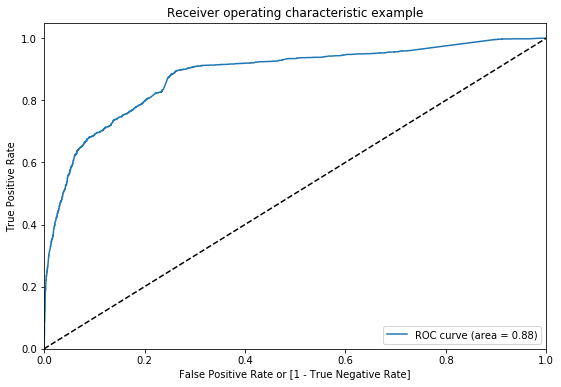

In [121]:
draw_roc(Y_train_pred_final.Converted, Y_train_pred_final.Conversion_Probability)

## Finding Optimal Cutoff Point

#### Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [122]:
#Create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    Y_train_pred_final[i]= Y_train_pred_final.Conversion_Probability.map(lambda x: 1 if x > i else 0)
Y_train_pred_final.head()

,Converted,Conversion_Probability,Lead_Score,Lead_ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.080591,8.059076,1871,0,1,0,0,0,0,0,0,0,0,0
1,0,0.165361,16.536063,6795,0,1,1,0,0,0,0,0,0,0,0
2,0,0.094760,9.476011,3516,0,1,0,0,0,0,0,0,0,0,0
3,0,0.787365,78.736492,8105,1,1,1,1,1,1,1,1,1,0,0
4,0,0.080591,8.059076,3934,0,1,0,0,0,0,0,0,0,0,0


In [123]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(Y_train_pred_final.Converted, Y_train_pred_final[i] )
    total1=sum(sum(cm1))
    Accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    Specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    Sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,Accuracy,Sensitivity,Specificity]
print(cutoff_df)

     Probability  Accuracy  Sensitivity  Specificity
0.0          0.0  0.381262     1.000000     0.000000
0.1          0.1  0.621212     0.942822     0.423038
0.2          0.2  0.785714     0.903893     0.712894
0.3          0.3  0.798856     0.879562     0.749125
0.4          0.4  0.806741     0.755474     0.838331
0.5          0.5  0.821274     0.682482     0.906797
0.6          0.6  0.818955     0.630170     0.935282
0.7          0.7  0.801948     0.558800     0.951774
0.8          0.8  0.772727     0.452149     0.970265
0.9          0.9  0.728510     0.303731     0.990255


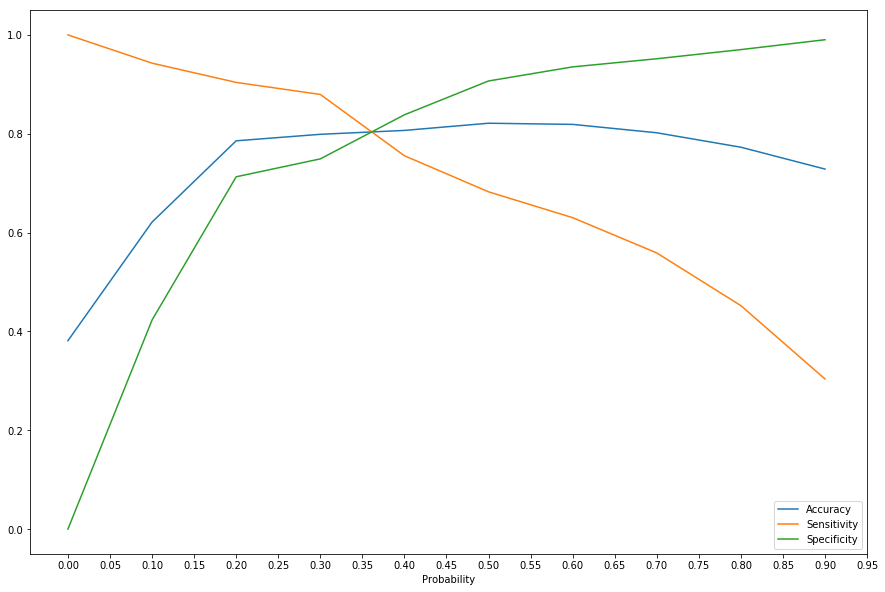

In [124]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity'],figsize=(15,10))
plt.xticks(np.arange(0, 1, step=0.05))
plt.show()

##### From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

## Precision and recall tradeoff

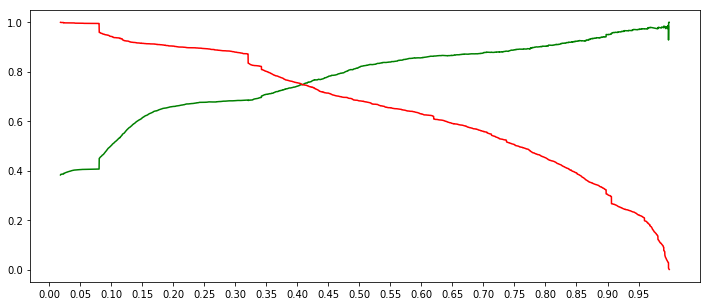

In [125]:
from sklearn.metrics import precision_recall_curve

p, r, thresholds = precision_recall_curve(Y_train_pred_final.Converted, Y_train_pred_final.Conversion_Probability)

plt.figure(figsize=(12,5))
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xticks(np.arange(0, 1, step=0.05))
plt.show()

##### As per Precision-Recall Tradeoff, the cutoff is around 0.425 (between 0.4 and 0.45) . We can chooose the cut-off as 0.47 and use the Precision-Recall-Accuracy metrics to evaluate the model.

In [126]:
Y_train_pred_final['final_predicted'] = Y_train_pred_final.Conversion_Probability.map( lambda x: 1 if x > 0.47 else 0)

Y_train_pred_final.head()

,Converted,Conversion_Probability,Lead_Score,Lead_ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.080591,8.059076,1871,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.165361,16.536063,6795,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.094760,9.476011,3516,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.787365,78.736492,8105,1,1,1,1,1,1,1,1,1,0,0,1
4,0,0.080591,8.059076,3934,0,1,0,0,0,0,0,0,0,0,0,0


In [127]:
#Overall accuracy.
metrics.accuracy_score(Y_train_pred_final.Converted, Y_train_pred_final.final_predicted)

0.8161719233147805

In [128]:
Confusion_Mat2 = metrics.confusion_matrix(Y_train_pred_final.Converted, Y_train_pred_final.final_predicted )
Confusion_Mat2

array([[3555,  447],
       [ 742, 1724]], dtype=int64)

In [129]:
#True positive 
TP = Confusion_Mat2[1,1] 

#True negatives
TN = Confusion_Mat2[0,0] 

#False positives
FP = Confusion_Mat2[0,1] 

#False negatives
FN = Confusion_Mat2[1,0]

In [130]:
#Sensitivity
TP / float(TP+FN)

0.6991078669910786

In [131]:
#Specificity
TN / float(TN+FP)

0.8883058470764618

In [132]:
# Calculate false postive rate - predicting converted when lead has not converted
print(FP/ float(TN+FP))

0.11169415292353824


In [133]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7941040994933211


In [134]:
# Negative predictive value
print (TN / float(TN+ FN))

0.827321387014196


## Train - Accuracy , Precision and Recall

In [135]:
#Accuracy
metrics.accuracy_score(Y_train_pred_final.Converted, Y_train_pred_final.final_predicted)

0.8161719233147805

In [136]:
# Precision 
TP / (TP + FP)

0.7941040994933211

In [137]:
# Recall 
TP / (TP + FN)

0.6991078669910786

## Making predictions on the test set

In [138]:
X_test[numerical_vars] = scaler.transform(X_test[numerical_vars])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [139]:
X_test = X_test[col]
X_test.head()

,do_not_email,total_time_spent_on_website,lead_origin_lead add form,lead_source_welingak website,current_occupation_working professional,lead_profile_other leads,lead_profile_select,lead_profile_student of someschool,last_notable_activity_had a phone conversation,last_notable_activity_sms sent,last_notable_activity_unreachable
4269,0,0.964504,0,0,0,0,1,0,0,1,0
2376,0,-0.885371,1,0,0,0,1,0,0,1,0
7766,0,-0.777416,0,0,1,0,1,0,0,0,1
9199,0,-0.885371,0,0,0,0,0,0,0,0,0
4359,0,-0.885371,1,0,0,0,0,0,0,0,0


In [140]:
X_test_sm = sm.add_constant(X_test)

In [141]:
Y_test_pred = Result.predict(X_test_sm)

In [142]:
Y_test_pred[:10]

4269    0.719584
2376    0.897727
7766    0.829832
9199    0.342181
4359    0.906289
9186    0.886456
1631    0.739364
8963    0.448971
8007    0.134899
5324    0.381641
dtype: float64

In [143]:
#Y Pred
Y_pred_1 = pd.DataFrame(Y_test_pred)
Y_pred_1.head()

,0
4269,0.719584
2376,0.897727
7766,0.829832
9199,0.342181
4359,0.906289


In [144]:
#Y Test
Y_test_df = pd.DataFrame(Y_test)
Y_test_df['Lead_ID'] = Y_test_df.index

In [145]:
# Combined df 
Y_pred_1.reset_index(drop=True, inplace=True)
Y_test_df.reset_index(drop=True, inplace=True)

In [146]:
Y_pred_final = pd.concat([Y_test_df, Y_pred_1 , Y_pred_1*100],axis=1)
Y_pred_final.head()

,converted,Lead_ID,0,0
0,1,4269,0.719584,71.958443
1,1,2376,0.897727,89.772739
2,1,7766,0.829832,82.983179
3,0,9199,0.342181,34.218085
4,1,4359,0.906289,90.628891


In [147]:
#Adding columns to df
Y_pred_final.columns = [ 'Converted' , 'Lead_ID', 'Conversion_Probability' , 'Lead_Score']
Y_pred_final.head()

,Converted,Lead_ID,Conversion_Probability,Lead_Score
0,1,4269,0.719584,71.958443
1,1,2376,0.897727,89.772739
2,1,7766,0.829832,82.983179
3,0,9199,0.342181,34.218085
4,1,4359,0.906289,90.628891


In [148]:
#precision - recall
Y_pred_final['final_predicted'] = Y_pred_final.Conversion_Probability.map(lambda x: 1 if x > 0.47 else 0)
Y_pred_final.head()

,Converted,Lead_ID,Conversion_Probability,Lead_Score,final_predicted
0,1,4269,0.719584,71.958443,1
1,1,2376,0.897727,89.772739,1
2,1,7766,0.829832,82.983179,1
3,0,9199,0.342181,34.218085,0
4,1,4359,0.906289,90.628891,1


In [149]:
Confusion_Mat3 = metrics.confusion_matrix(Y_pred_final.Converted, Y_pred_final.final_predicted )
Confusion_Mat3

array([[1500,  177],
       [ 336,  759]], dtype=int64)

In [150]:
#True positive 
TP = Confusion_Mat3[1,1] 

#True negatives
TN = Confusion_Mat3[0,0] 

#False positives
FP = Confusion_Mat3[0,1] 

#False negatives
FN = Confusion_Mat3[1,0]

## Test - Accuracy, Precision and Recall

In [151]:
# Accuracy.
metrics.accuracy_score(Y_pred_final.Converted, Y_pred_final.final_predicted)

0.814935064935065

In [152]:
# Precision
TP / float(TP+FP)

0.8108974358974359

In [153]:
# Recall
TP / float(TP+FN)

0.6931506849315069

In [154]:
#Varying the cutoff range

prob = []
potential_leads = []
for i in np.arange(0.05,1,0.05):
    prob.append(i)
    potential_leads.append(sum(Y_train_pred_final.Conversion_Probability.map(lambda x: 1 if x > i else 0)) + 
                           sum(Y_pred_final.Conversion_Probability.map(lambda x: 1 if x > i else 0)))

In [155]:
projected_leads = pd.DataFrame([prob,potential_leads]).T.rename(columns={0:'Probability Cut-Off',1:'Projected Leads'})

In [156]:
projected_leads

,Probability Cut-Off,Projected Leads
0,0.05,8686.0
1,0.10,6662.0
2,0.15,5260.0
3,0.20,4827.0
4,0.25,4653.0
5,0.30,4522.0
6,0.35,3972.0
7,0.40,3571.0
8,0.45,3223.0
9,0.50,2932.0


#### Merging the original dataframe

In [157]:
#Lead_ID
Lead_list = list(Y_train_pred_final.Lead_ID)
Lead_list.extend(Y_pred_final.Lead_ID)

In [158]:
#Lead Scores
Score_list = list(Y_train_pred_final.Lead_Score)
Score_list.extend(Y_pred_final.Lead_Score)

In [159]:
#Predicted Value
Pred_list = list(Y_train_pred_final.final_predicted)
Pred_list.extend(Y_pred_final.final_predicted)

In [160]:
# Create a dataframe using the above 3 lists , change the dtypes and set index
Lead_Score_Predication = pd.DataFrame([Lead_list,Score_list,Pred_list]).T.\
rename(columns={0:'Lead_ID',1 : 'Lead_Score', 2:'Final_Prediction'})

Lead_Score_Predication.Final_Prediction = Lead_Score_Predication.Final_Prediction.astype('int')

Lead_Score_Predication.Lead_ID = Lead_Score_Predication.Lead_ID.astype('int')

Lead_Score_Predication.set_index(Lead_Score_Predication.Lead_ID,drop=False,inplace=True)

Lead_Score_Predication.head()

,Lead_ID,Lead_Score,Final_Prediction
Lead_ID,,,
1871,1871,8.059076,0
6795,6795,16.536063,0
3516,3516,9.476011,0
8105,8105,78.736492,1
3934,3934,8.059076,0


In [161]:
#Original data
Original_df = pd.read_csv('Leads.csv',encoding='utf-8')

In [162]:
#Merge lead_score_predication and Original data
Master_df = pd.merge(Original_df, Lead_Score_Predication,left_index=True,right_index=True)
Master_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Lead_ID,Lead_Score,Final_Prediction
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,02.Medium,02.Medium,15.0,15.0,No,No,Modified,0,8.059076,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened,1,21.320032,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened,2,87.121307,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,02.Medium,01.High,13.0,17.0,No,No,Modified,3,12.745753,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,02.Medium,01.High,15.0,18.0,No,No,Modified,4,48.920758,1
